(assign2_hydro)=
# Assign 2: Scale heights for typical atmospheric soundings

tentative deadline -- Friday 5pm

## Tasks

1. Get a unique sounding for your assigned region and season
2. Plot the dewpoint and temperature soundings using metpy
3. Write a function to calculate the pressure scale height
4. Write a funcion to calculate the  density scale height
5. Plot the  vertical pressure profile vs. the hydrostatic pressure profile for your pressure scale height

### 1. Getting a sounding

In the cell below, change the region, year, month and station to get a unique sounding for analysis (i.e. I'd like to spread out the soundings among regions and seasons).  The url for the Wyoming page is:  [https://weather.uwyo.edu/upperair/sounding.html](https://weather.uwyo.edu/upperair/sounding.html)

In [1]:
from a500.soundings.wyominglib import write_soundings
import numpy as np
sounding_dir = 'sounding_dir'
write = True
if write:
    region = 'samer'
    year = '2013'
    month= '7'
    start = '0100'
    stop = '0110'
    station = '71109'
    values=dict(region=region,year=year,month=month,start=start,stop=stop,station=station)
    write_soundings(values, sounding_dir)

14503
header is:  71109 YZT Port Hardy Observations at 00Z 01 Jul 2013
here is the day:  130701
files written to sounding_dir


In [2]:
from a500.soundings.wyominglib import read_soundings
wyoming_dict = read_soundings(sounding_dir)
sounding_dict = wyoming_dict['sounding_dict']
the_sounding = sounding_dict[(2013, 7, 1, 0)]
press = the_sounding['pres'].to_numpy() #hPa
dewpoint = the_sounding['dwpt'].to_numpy() #degC
temp = the_sounding['temp'].to_numpy() # degC
height = the_sounding['hght'].to_numpy() #m
tempK = temp + 273.15
pressPa = press*100.
height_km = height/1000.

In [3]:
the_sounding

,Unnamed: 0,pres,hght,temp,dwpt,relh,mixr,drct,sknt,thta,thte,thtv
0,0,1014.0,17.0,18.4,14.8,80.0,10.493078,350.0,5.0,290.4,320.3,292.2
1,1,1012.0,34.0,17.0,12.3,74.0,8.911909,346.0,6.0,289.2,314.6,290.7
2,2,1001.0,125.0,15.6,12.0,79.0,8.832533,327.0,11.0,288.7,313.8,290.2
3,3,1000.0,133.0,15.6,12.0,79.0,8.841491,325.0,11.0,288.8,313.9,290.3
4,4,980.0,306.0,18.4,12.4,68.0,9.268841,320.0,10.0,293.2,320.1,294.9
...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,10.0,31750.0,-35.1,-73.1,1.0,0.194108,80.0,35.0,887.4,889.8,887.5
146,146,9.2,32309.0,-33.9,-72.4,1.0,0.233963,95.0,29.0,912.3,915.4,912.4
147,147,8.8,32614.0,-33.2,-72.0,1.0,0.259383,85.0,42.0,926.2,929.6,926.4
148,148,8.1,33223.0,-31.9,-71.2,1.0,0.316642,105.0,34.0,954.6,958.9,954.8


###  2. Plot the sounding

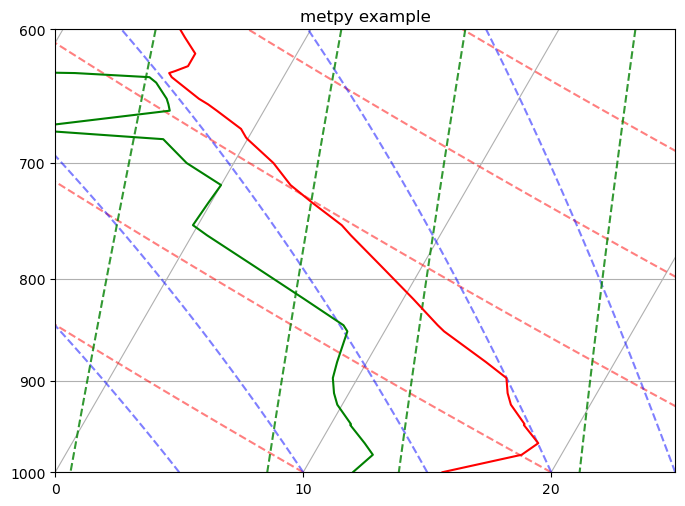

In [4]:
from metpy.plots import SkewT
from metpy.units import units
from matplotlib import pyplot as plt
import numpy as np
fig,ax =plt.subplots(1,1,figsize=(8,8))
fig.clf()
skew_plot = SkewT(fig)
skew_plot.ax.set_title("metpy example")
skew_plot.ax.set(xlim=(0,25),ylim=(1000,600))
theta = np.array([0,10,20,30,40,50,60]) + 273.15
theta = theta*units("K")
skew_plot.plot_dry_adiabats(t0=theta)
skew_plot.plot_moist_adiabats()
skew_plot.plot_mixing_lines()
skew_plot.plot(press,temp,'r')
skew_plot.plot(press,dewpoint,'g');

### 3. Calculate the pressure scale height

Here is equation 14 of the [hydrostatic balance notes](https://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/hydro.pdf)

$$\frac{ 1}{\overline{H_p}} =  \overline{ \left ( \frac{1 }{H} \right )} = \frac{\int_{0 }^{z}\!\frac{1}{H} dz^\prime  }{z-0} $$

where

$$H=R_d T/g$$

a. Turn this into a python function called calc_scale_height that takes sounding vectors of temperature, pressure and height and returns
   the pressure scale height in meters

b.  Use this to find the pressure scale height in meters  as a scalar variable named Hbar

In [5]:
#
#  in this cell define a function called
#
#  calc_scale_height(T,p,z)
#  which takes vertical profiles of temperature, pressure and height and calculates the
#  pressure scale height in meters  -- save this into a variable named Hbar
#

### 4. Calculate the density scale height

Similarly, equation (23) of the [hydrostatic balance notes](https://clouds.eos.ubc.ca/~phil/courses/atsc500/docs/hydro.pdf)
is:

$$\frac{d\rho }{\rho} = - \left ( \frac{1 }{H} + 
                   \frac{1 }{T} \frac{dT }{dz} \right ) dz \equiv - \frac{dz }{H_\rho} $$
                   
Which leads to 

$$\frac{ 1}{\overline{H_\rho}}  = \frac{\int_{0 }^{z}\!\left [ \frac{1}{H} + \frac{1 }{T} \frac{dT }{dz} \right ] dz^\prime  }{z-0} $$

In the cell below write a python function called calc_dense_height

In [6]:
#
#  in this cell define a function called
#
#  calc_dense_height(T,p,z)
#  which takes vertical profiles of temperature, pressure and height and calculates the
#  density scale height in meters  -- save this into a variable named Hrho
#

### 5. How does the hydrostatic profile compare to the observed pressure sounding?

Now check the hydrostatic approximation by plotting the pressure column against

$$p(z) = p_0 \exp \left (-z/\overline{H_p} \right )$$

vs. the actual sounding p(T):

In [7]:
#
#  In this cell make a plot with two lines, 
#
#  line 1: press (hPa) vs. height_km (vertical axis)
#  line 2: press p(z) from equation 5 (hPa) vs. height_km
#
#  include a legend that clear identifies the two lines
#  set the y axis limits from 0 to 10 km
#